In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [3]:
noise_data = pd.read_csv('C:/Users/USER/Desktop/J-EDA/noise_data.csv',encoding='latin1', low_memory=False)

In [4]:
# Noise limit constants
DAY_LIMIT_RES = 55.3
DAY_LIMIT_COM = 65
DAY_LIMIT_IND = 75
DAY_LIMIT_SIL = 50

NIGHT_LIMIT_RES = 45
NIGHT_LIMIT_COM = 55
NIGHT_LIMIT_IND = 70
NIGHT_LIMIT_SIL = 40

In [5]:
noise_data.head()

,Station,Year,Month,Day,Night,DayLimit,NightLimit
0,BEN01,2011,2,66.0,56.0,55,45
1,BEN01,2011,3,66.0,58.0,55,45
2,BEN01,2011,4,66.0,57.0,55,45
3,BEN01,2011,5,66.0,56.0,55,45
4,BEN01,2011,6,67.0,57.0,55,45


In [6]:
noise_data.isna().sum()

Station        0
Year           0
Month          0
Day            8
Night         14
DayLimit       0
NightLimit     0
dtype: int64

In [7]:
missing_percentages = noise_data.isna().sum() / len(noise_data) * 100
missing_percentages

Station       0.00000
Year          0.00000
Month         0.00000
Day           0.15984
Night         0.27972
DayLimit      0.00000
NightLimit    0.00000
dtype: float64

Text(0.5, 1.0, 'Missing Percentages')

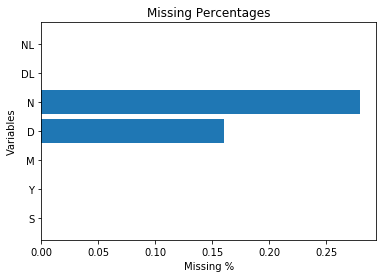

In [8]:
labels = ['S', 'Y', 'M', 'D', 'N', 'DL', 'NL']
plt.barh(labels, missing_percentages)
plt.xlabel('Missing %')
plt.ylabel('Variables')
plt.title('Missing Percentages')

## Impute missing values

In [9]:
noise_data['Day'].fillna(method='ffill', inplace=True)
noise_data['Night'].fillna(method='ffill', inplace=True)

In [10]:
missing_percentages = noise_data.isna().sum() / len(noise_data) * 100
missing_percentages

Station       0.0
Year          0.0
Month         0.0
Day           0.0
Night         0.0
DayLimit      0.0
NightLimit    0.0
dtype: float64

In [11]:
noise_data.head()

,Station,Year,Month,Day,Night,DayLimit,NightLimit
0,BEN01,2011,2,66.0,56.0,55,45
1,BEN01,2011,3,66.0,58.0,55,45
2,BEN01,2011,4,66.0,57.0,55,45
3,BEN01,2011,5,66.0,56.0,55,45
4,BEN01,2011,6,67.0,57.0,55,45


In [12]:
noise_data['Day'].describe()

count    5005.000000
mean       65.816983
std         7.411756
min        31.000000
25%        61.000000
50%        66.000000
75%        71.000000
max       100.000000
Name: Day, dtype: float64

In [13]:
noise_data['Night'].describe()

count    5005.000000
mean       60.443357
std         8.177600
min        25.000000
25%        55.000000
50%        59.000000
75%        66.000000
max       103.000000
Name: Night, dtype: float64

In [14]:
station_info = pd.read_csv('C:/Users/USER/Desktop/J-EDA/stations.csv')

In [15]:
station_info.head()

,Station,Name,City,State,Type
0,DEL01,Dilshad Garden,Delhi,Delhi,Silence
1,DEL02,"CPCB, HQ",Delhi,Delhi,Commercial
2,DEL03,"DCE, Bawana",Delhi,Delhi,Silence
3,DEL04,ITO,Delhi,Delhi,Commercial
4,DEL05,"NSIT, Dwarka",Delhi,Delhi,Silence


In [16]:
noise_data.head()

,Station,Year,Month,Day,Night,DayLimit,NightLimit
0,BEN01,2011,2,66.0,56.0,55,45
1,BEN01,2011,3,66.0,58.0,55,45
2,BEN01,2011,4,66.0,57.0,55,45
3,BEN01,2011,5,66.0,56.0,55,45
4,BEN01,2011,6,67.0,57.0,55,45


In [17]:
merged_data = pd.merge(noise_data, station_info, left_on='Station', right_on='Station', how='inner')

In [18]:
noise_data = merged_data
noise_data.rename(columns={'Name': 'Location'}, inplace=True)

In [19]:
noise_data.head()

,Station,Year,Month,Day,Night,DayLimit,NightLimit,Location,City,State,Type
0,BEN01,2011,2,66.0,56.0,55,45,BTM,Bengaluru,Karnataka,Residential
1,BEN01,2011,3,66.0,58.0,55,45,BTM,Bengaluru,Karnataka,Residential
2,BEN01,2011,4,66.0,57.0,55,45,BTM,Bengaluru,Karnataka,Residential
3,BEN01,2011,5,66.0,56.0,55,45,BTM,Bengaluru,Karnataka,Residential
4,BEN01,2011,6,67.0,57.0,55,45,BTM,Bengaluru,Karnataka,Residential


In [20]:
# Check for duplicate rows
noise_data[noise_data.duplicated(['Station', 'Year', 'Month'])]

,Station,Year,Month,Day,Night,DayLimit,NightLimit,Location,City,State,Type


In [21]:
# Remove rows not required for the analysis
noise_data = noise_data[(noise_data['City'] != "Lucknow") & (noise_data['City'] != "Navi Mumbai")]

## Checking for outliers

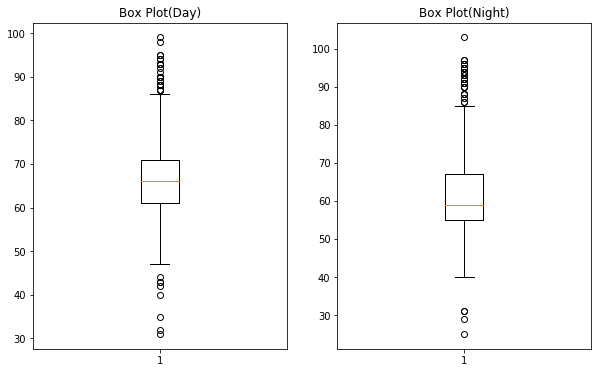

In [22]:
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.boxplot(noise_data['Day'])
plt.title('Box Plot(Day)')

plt.subplot(1, 2, 2)
plt.boxplot(noise_data['Night'])
plt.title('Box Plot(Night)')
plt.show()

## Create dataframe of each city

## Mumbai

In [23]:
# Mumbai year wise
df_mumbai = noise_data[noise_data['City'] == 'Mumbai']
df_mumbai_yr = df_mumbai.groupby('Year')[['Day', 'Night']].mean()
df_mumbai_yr.head()

,Day,Night
Year,,
2011,66.295455,60.977273
2012,65.604167,60.916667
2013,66.250000,61.729167
2014,67.833333,62.875000
2015,67.666667,62.777778


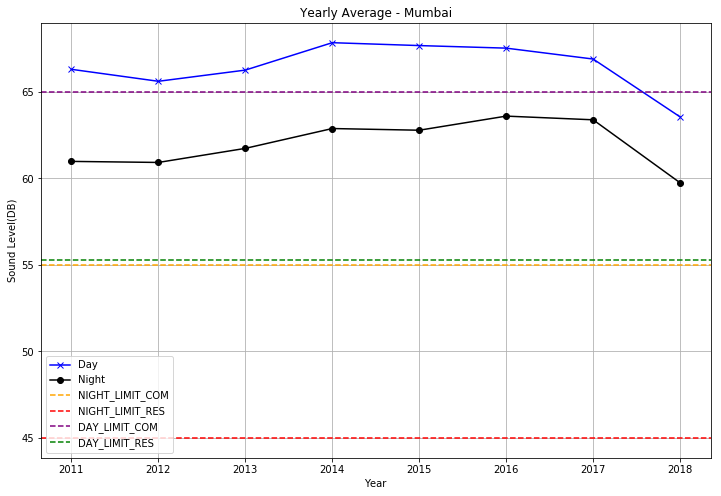

In [84]:
# Mumbai graph(yearly avg)
plt.figure(figsize=(12, 8))
plt.plot(df_mumbai_yr['Day'], label="Day", marker="x", color="blue")
plt.plot(df_mumbai_yr['Night'], label="Night", marker="o", color="Black")
plt.xlabel("Year")
plt.ylabel("Sound Level(DB)")
plt.title('Yearly Average - Mumbai')
# Limit lines
plt.axhline(y=NIGHT_LIMIT_COM, label="NIGHT_LIMIT_COM", linestyle='dashed', color="orange")
plt.axhline(y=NIGHT_LIMIT_RES, label="NIGHT_LIMIT_RES", linestyle='dashed', color="red")
plt.axhline(y=DAY_LIMIT_COM, label="DAY_LIMIT_COM", linestyle='dashed', color="purple")
plt.axhline(y=DAY_LIMIT_RES, label="DAY_LIMIT_RES", linestyle='dashed', color="green")

plt.legend(loc='lower left')
plt.grid()
plt.show()

In [25]:
# Mumbai month wise
df_mumbai = noise_data[noise_data['City'] == 'Mumbai']
df_mumbai_month = df_mumbai.groupby('Month')[['Day', 'Night']].mean()
df_mumbai_month.head()

,Day,Night
Month,,
1,66.354167,61.291667
2,66.173077,61.519231
3,65.788462,60.653846
4,66.211538,61.634615
5,66.365385,63.134615


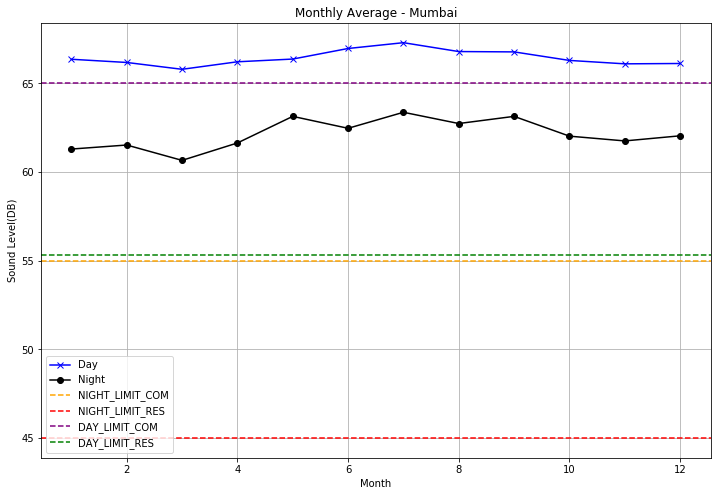

In [85]:
# Mumbai monthly graph
plt.figure(figsize=(12, 8))
plt.plot(df_mumbai_month['Day'], label="Day", marker="x", color="blue")
plt.plot(df_mumbai_month['Night'], label="Night", marker="o", color="Black")
plt.xlabel("Month")
plt.ylabel("Sound Level(DB)")
plt.title('Monthly Average - Mumbai')
# Limit lines
plt.axhline(y=NIGHT_LIMIT_COM, label="NIGHT_LIMIT_COM", linestyle='dashed', color="orange")
plt.axhline(y=NIGHT_LIMIT_RES, label="NIGHT_LIMIT_RES", linestyle='dashed', color="red")
plt.axhline(y=DAY_LIMIT_COM, label="DAY_LIMIT_COM", linestyle='dashed', color="purple")
plt.axhline(y=DAY_LIMIT_RES, label="DAY_LIMIT_RES", linestyle='dashed', color="green")

plt.legend(loc='lower left')
plt.grid()
plt.show()

In [27]:
# Mumbai location wise
df_mumbai_loc = df_mumbai[df_mumbai['Year'] == 2018]
df_mumbai_loc = df_mumbai_loc.groupby(['Location', 'Type']).agg({'Day': 'mean', 'Night': 'mean'})
df_mumbai_loc = df_mumbai_loc.reset_index()
df_mumbai_loc.head()

,Location,Type,Day,Night
0,ASHP Hospital,Silence,54.583333,54.166667
1,Andheri,Industrial,70.833333,67.000000
2,Bandra,Commercial,62.333333,62.166667
3,CST,Commercial,72.416667,68.083333
4,Chembur,Residential,65.583333,59.250000


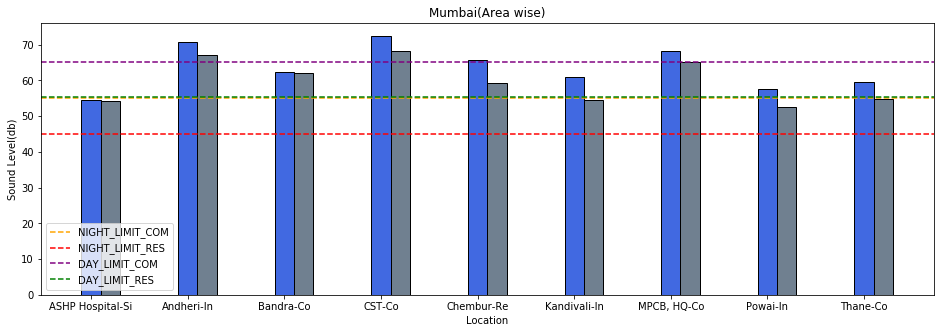

In [28]:
# Mumbai location wise grpah
r1 = np.arange(df_mumbai_loc.shape[0])
r1
width1 = .2
plt.figure(figsize=(16, 5))
plt.bar(df_mumbai_loc['Location']+"-"+df_mumbai_loc['Type'].str[:2],df_mumbai_loc['Day'],
        width=width1, color='royalblue', edgecolor = 'k')
plt.bar(r1+width1, df_mumbai_loc['Night'], width=width1, color='slategrey', edgecolor = 'k')
# Limit lines
plt.axhline(y=NIGHT_LIMIT_COM, label="NIGHT_LIMIT_COM", linestyle='dashed', color="orange")
plt.axhline(y=NIGHT_LIMIT_RES, label="NIGHT_LIMIT_RES", linestyle='dashed', color="red")
plt.axhline(y=DAY_LIMIT_COM, label="DAY_LIMIT_COM", linestyle='dashed', color="purple")
plt.axhline(y=DAY_LIMIT_RES, label="DAY_LIMIT_RES", linestyle='dashed', color="green")

plt.title("Mumbai(Area wise)")
plt.xlabel("Location")
plt.ylabel("Sound Level(db)")
plt.legend(loc='lower left')
plt.show()

## Delhi

In [29]:
# Delhi year wise
df_delhi = noise_data[noise_data['City'] == 'Delhi']
df_delhi_yr = df_delhi.groupby('Year')[['Day', 'Night']].mean()
df_delhi_yr.head()

,Day,Night
Year,,
2011,59.763636,55.909091
2012,58.500000,54.650000
2013,59.183333,55.400000
2014,59.850000,55.333333
2015,65.625000,61.000000


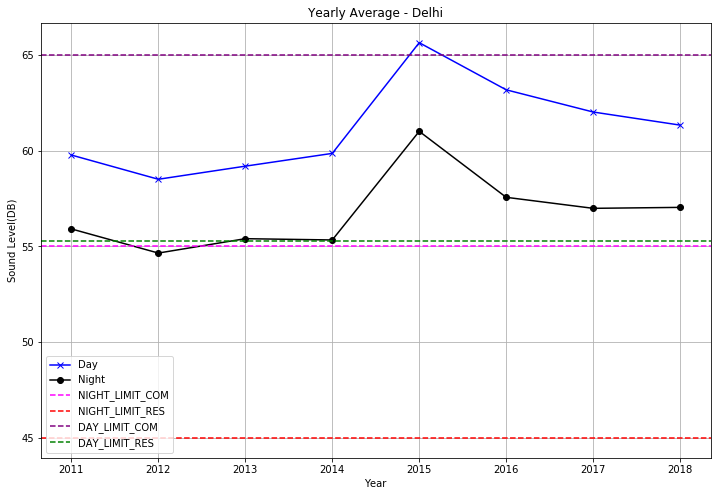

In [86]:
# Delhi yearly graph
plt.figure(figsize=(12, 8))
plt.plot(df_delhi_yr['Day'], label="Day", marker="x", color="blue")
plt.plot(df_delhi_yr['Night'], label="Night", marker="o", color="Black")
plt.xlabel("Year")
plt.ylabel("Sound Level(DB)")
plt.title('Yearly Average - Delhi')
plt.axhline(y=NIGHT_LIMIT_COM, label="NIGHT_LIMIT_COM", linestyle='dashed', color="magenta")
plt.axhline(y=NIGHT_LIMIT_RES, label="NIGHT_LIMIT_RES", linestyle='dashed', color="red")
plt.axhline(y=DAY_LIMIT_COM, label="DAY_LIMIT_COM", linestyle='dashed', color="purple")
plt.axhline(y=DAY_LIMIT_RES, label="DAY_LIMIT_RES", linestyle='dashed', color="green")
plt.legend(loc="lower left")
plt.grid()
plt.show()

In [31]:
# Delhi month wise
df_delhi = noise_data[noise_data['City'] == 'Delhi']
df_delhi_month = df_delhi.groupby('Month')[['Day', 'Night']].mean()
df_delhi_month.head()

,Day,Night
Month,,
1,62.636364,56.981818
2,62.600000,57.583333
3,61.533333,56.916667
4,61.483333,57.366667
5,61.383333,57.450000


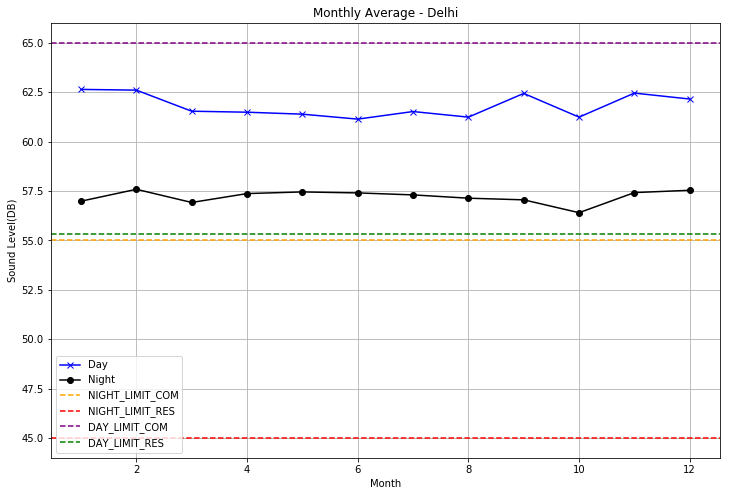

In [87]:
# Delhi monthly graph
plt.figure(figsize=(12, 8))
plt.plot(df_delhi_month['Day'], label="Day", marker="x", color="blue")
plt.plot(df_delhi_month['Night'], label="Night", marker="o", color="Black")
plt.xlabel("Month")
plt.ylabel("Sound Level(DB)")
plt.title('Monthly Average - Delhi')
# Limit lines
plt.axhline(y=NIGHT_LIMIT_COM, label="NIGHT_LIMIT_COM", linestyle='dashed', color="orange")
plt.axhline(y=NIGHT_LIMIT_RES, label="NIGHT_LIMIT_RES", linestyle='dashed', color="red")
plt.axhline(y=DAY_LIMIT_COM, label="DAY_LIMIT_COM", linestyle='dashed', color="purple")
plt.axhline(y=DAY_LIMIT_RES, label="DAY_LIMIT_RES", linestyle='dashed', color="green")

plt.legend(loc='lower left')
plt.grid()
plt.show()

In [33]:
# Delhi location wise (2018)
df_delhi_loc = df_delhi[df_delhi['Year'] == 2018]
df_delhi_loc = df_delhi_loc.groupby(['Location', 'Type']).agg({'Day': 'mean', 'Night': 'mean'})
df_delhi_loc = df_delhi_loc.reset_index()
df_delhi_loc.head()

,Location,Type,Day,Night
0,Anand Vihar,Commercial,66.250000,63.916667
1,"CPCB, HQ",Commercial,66.083333,57.833333
2,Civil Lines,Commercial,61.000000,58.750000
3,"DCE, Bawana",Silence,55.750000,51.500000
4,Dilshad Garden,Silence,56.333333,56.583333


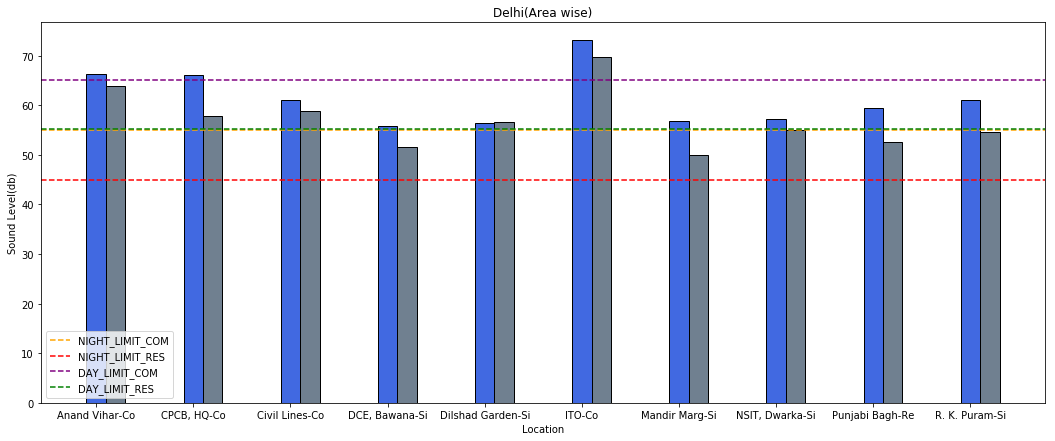

In [34]:
r1 = np.arange(df_delhi_loc.shape[0])
r1
width1 = .2
plt.figure(figsize=(18, 7))
plt.bar(df_delhi_loc['Location']+"-"+df_delhi_loc['Type'].str[:2],df_delhi_loc['Day'],
        width=width1, color='royalblue', edgecolor = 'k')
plt.bar(r1+width1, df_delhi_loc['Night'], width=width1, color='slategrey', edgecolor = 'k')
# Limit lines
plt.axhline(y=NIGHT_LIMIT_COM, label="NIGHT_LIMIT_COM", linestyle='dashed', color="orange")
plt.axhline(y=NIGHT_LIMIT_RES, label="NIGHT_LIMIT_RES", linestyle='dashed', color="red")
plt.axhline(y=DAY_LIMIT_COM, label="DAY_LIMIT_COM", linestyle='dashed', color="purple")
plt.axhline(y=DAY_LIMIT_RES, label="DAY_LIMIT_RES", linestyle='dashed', color="green")

plt.title("Delhi(Area wise)")
plt.xlabel("Location")
plt.ylabel("Sound Level(db)")
plt.legend(loc='lower left')
plt.show()

## Kolkata

In [35]:
# Kolkata year wise
df_kolkata = noise_data[noise_data['City'] == 'Kolkata']
df_kolkata_yr = df_kolkata.groupby('Year')[['Day', 'Night']].mean()
df_kolkata_yr.head()

,Day,Night
Year,,
2011,61.727273,55.600000
2012,61.850000,56.100000
2013,62.716667,60.700000
2014,64.050000,59.483333
2015,68.191667,64.125000


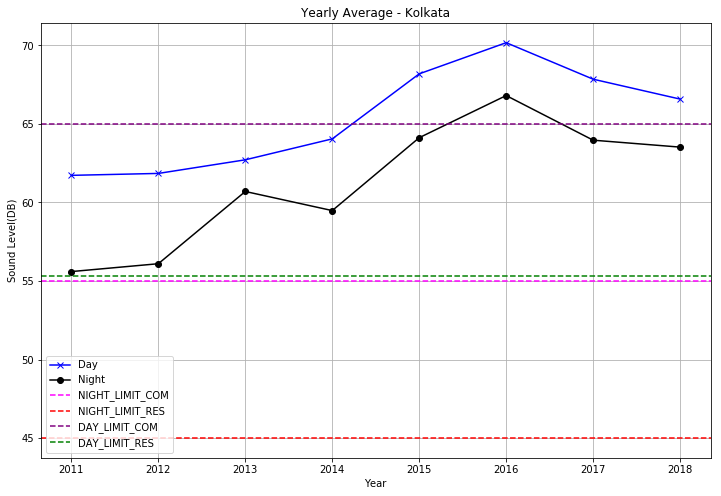

In [88]:
# Kolkata yearly graph
plt.figure(figsize=(12, 8))
plt.plot(df_kolkata_yr['Day'], label="Day", marker="x", color="blue")
plt.plot(df_kolkata_yr['Night'], label="Night", marker="o", color="Black")
plt.xlabel("Year")
plt.ylabel("Sound Level(DB)")
plt.title('Yearly Average - Kolkata')
plt.axhline(y=NIGHT_LIMIT_COM, label="NIGHT_LIMIT_COM", linestyle='dashed', color="magenta")
plt.axhline(y=NIGHT_LIMIT_RES, label="NIGHT_LIMIT_RES", linestyle='dashed', color="red")
plt.axhline(y=DAY_LIMIT_COM, label="DAY_LIMIT_COM", linestyle='dashed', color="purple")
plt.axhline(y=DAY_LIMIT_RES, label="DAY_LIMIT_RES", linestyle='dashed', color="green")
plt.legend(loc="lower left")
plt.grid()
plt.show()

In [37]:
# Kolkata month wise
df_kolkata = noise_data[noise_data['City'] == 'Kolkata']
df_kolkata_month = df_kolkata.groupby('Month')[['Day', 'Night']].mean()
df_kolkata_month

,Day,Night
Month,,
1,66.200000,61.345455
2,65.450000,61.150000
3,65.483333,61.216667
4,66.233333,63.216667
5,66.683333,63.050000
6,66.166667,62.583333
7,67.333333,63.583333
8,66.866667,62.850000
9,66.183333,62.433333


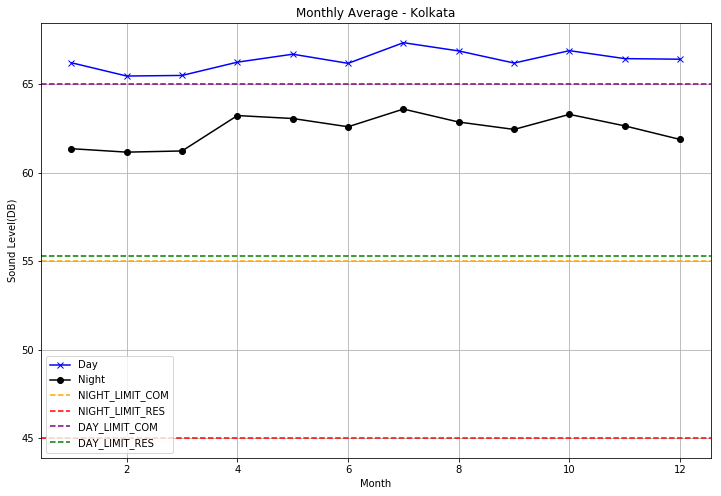

In [89]:
# Kolkata monthly graph
plt.figure(figsize=(12, 8))
plt.plot(df_kolkata_month['Day'], label="Day", marker="x", color="blue")
plt.plot(df_kolkata_month['Night'], label="Night", marker="o", color="Black")
plt.xlabel("Month")
plt.ylabel("Sound Level(DB)")
plt.title('Monthly Average - Kolkata')
# Limit lines
plt.axhline(y=NIGHT_LIMIT_COM, label="NIGHT_LIMIT_COM", linestyle='dashed', color="orange")
plt.axhline(y=NIGHT_LIMIT_RES, label="NIGHT_LIMIT_RES", linestyle='dashed', color="red")
plt.axhline(y=DAY_LIMIT_COM, label="DAY_LIMIT_COM", linestyle='dashed', color="purple")
plt.axhline(y=DAY_LIMIT_RES, label="DAY_LIMIT_RES", linestyle='dashed', color="green")

plt.legend(loc='lower left')
plt.grid()
plt.show()

In [39]:
# Kolkata location wise
df_kolkata_loc = df_kolkata[df_kolkata['Year'] == 2018]
df_kolkata_loc = df_kolkata_loc.groupby(['Location', 'Type']).agg({'Day': 'mean', 'Night': 'mean'})
df_kolkata_loc = df_kolkata_loc.reset_index()
df_kolkata_loc.head()

,Location,Type,Day,Night
0,Bag Bazar,Residential,74.666667,69.333333
1,Birati Neelachal,Residential,63.750000,58.166667
2,Gol Park,Industrial,64.916667,65.833333
3,New Market,Commercial,71.250000,71.166667
4,Patauli,Residential,62.583333,62.333333


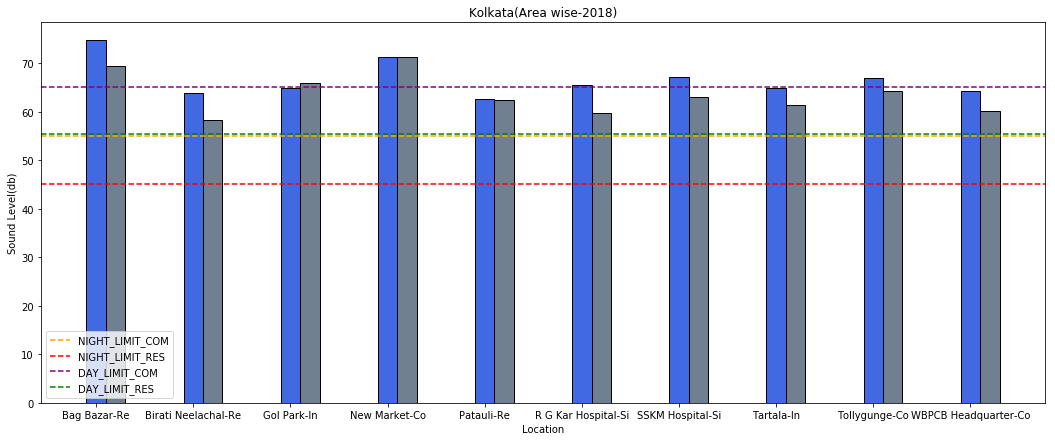

In [40]:
r1 = np.arange(df_kolkata_loc.shape[0])
r1
width1 = .2
plt.figure(figsize=(18, 7))
plt.bar(df_kolkata_loc['Location']+"-"+df_kolkata_loc['Type'].str[:2],df_kolkata_loc['Day'],
        width=width1, color='royalblue', edgecolor = 'k')
plt.bar(r1+width1, df_kolkata_loc['Night'], width=width1, color='slategrey',  edgecolor = 'k')
# Limit lines
plt.axhline(y=NIGHT_LIMIT_COM, label="NIGHT_LIMIT_COM", linestyle='dashed', color="orange")
plt.axhline(y=NIGHT_LIMIT_RES, label="NIGHT_LIMIT_RES", linestyle='dashed', color="red")
plt.axhline(y=DAY_LIMIT_COM, label="DAY_LIMIT_COM", linestyle='dashed', color="purple")
plt.axhline(y=DAY_LIMIT_RES, label="DAY_LIMIT_RES", linestyle='dashed', color="green")

plt.title("Kolkata(Area wise-2018)")
plt.xlabel("Location")
plt.ylabel("Sound Level(db)")
plt.legend(loc='lower left')
plt.show()

## Hyderabad

In [41]:
# Hyderabad year wise
df_hyderabad = noise_data[noise_data['City'] == 'Hyderabad']
df_hyderabad_yr = df_hyderabad .groupby('Year')[['Day', 'Night']].mean()
df_hyderabad_yr.head()

,Day,Night
Year,,
2011,65.072727,58.272727
2012,64.116667,57.316667
2013,64.366667,57.600000
2014,66.016667,59.233333
2015,67.600000,61.741667


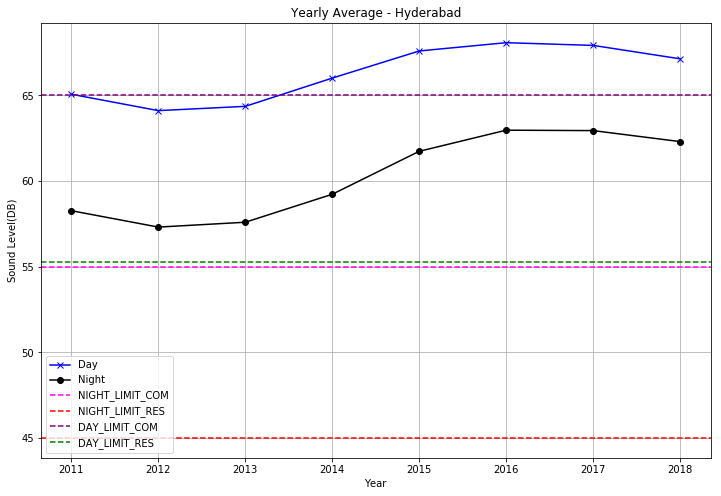

In [90]:
# Hyderabad yearly graph
plt.figure(figsize=(12, 8))
plt.plot(df_hyderabad_yr['Day'], label="Day", marker="x", color="blue")
plt.plot(df_hyderabad_yr['Night'], label="Night", marker="o", color="Black")
plt.xlabel("Year")
plt.ylabel("Sound Level(DB)")
plt.title('Yearly Average - Hyderabad')
plt.axhline(y=NIGHT_LIMIT_COM, label="NIGHT_LIMIT_COM", linestyle='dashed', color="magenta")
plt.axhline(y=NIGHT_LIMIT_RES, label="NIGHT_LIMIT_RES", linestyle='dashed', color="red")
plt.axhline(y=DAY_LIMIT_COM, label="DAY_LIMIT_COM", linestyle='dashed', color="purple")
plt.axhline(y=DAY_LIMIT_RES, label="DAY_LIMIT_RES", linestyle='dashed', color="green")
plt.legend(loc="lower left")
plt.grid()
plt.show()

In [43]:
# Hyderabad month wise
df_hyderabad = noise_data[noise_data['City'] == 'Hyderabad']
df_hyderabad_month = df_hyderabad.groupby('Month')[['Day', 'Night']].mean()
df_hyderabad_month.head()

,Day,Night
Month,,
1,66.072727,59.909091
2,66.450000,60.583333
3,65.816667,59.733333
4,66.450000,60.933333
5,66.466667,61.616667


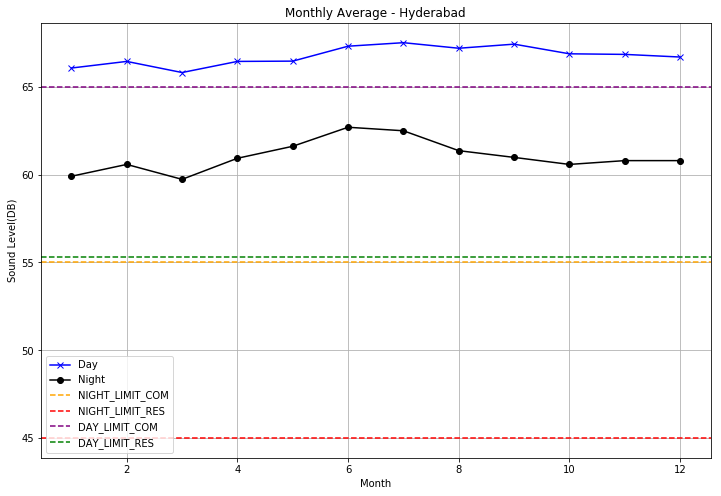

In [91]:
# Hyderabad monthly graph
plt.figure(figsize=(12, 8))
plt.plot(df_hyderabad_month['Day'], label="Day", marker="x", color="blue")
plt.plot(df_hyderabad_month['Night'], label="Night", marker="o", color="Black")
plt.xlabel("Month")
plt.ylabel("Sound Level(DB)")
plt.title('Monthly Average - Hyderabad')
# Limit lines
plt.axhline(y=NIGHT_LIMIT_COM, label="NIGHT_LIMIT_COM", linestyle='dashed', color="orange")
plt.axhline(y=NIGHT_LIMIT_RES, label="NIGHT_LIMIT_RES", linestyle='dashed', color="red")
plt.axhline(y=DAY_LIMIT_COM, label="DAY_LIMIT_COM", linestyle='dashed', color="purple")
plt.axhline(y=DAY_LIMIT_RES, label="DAY_LIMIT_RES", linestyle='dashed', color="green")

plt.legend(loc='lower left')
plt.grid()
plt.show()

In [45]:
# Hyderabad location wise
df_hyderabad_loc = df_hyderabad[df_hyderabad['Year'] == 2018]
df_hyderabad_loc = df_hyderabad_loc.groupby(['Location', 'Type']).agg({'Day': 'mean', 'Night': 'mean'})
df_hyderabad_loc = df_hyderabad_loc.reset_index()
df_hyderabad_loc.head()

,Location,Type,Day,Night
0,ABITS,Commercial,74.250000,67.750000
1,Gachibowli,Silence,59.416667,54.000000
2,Gaddapotharam,Industrial,69.166667,61.083333
3,JNTU,Commercial,70.250000,67.250000
4,Jeedimetla,Industrial,69.500000,64.916667


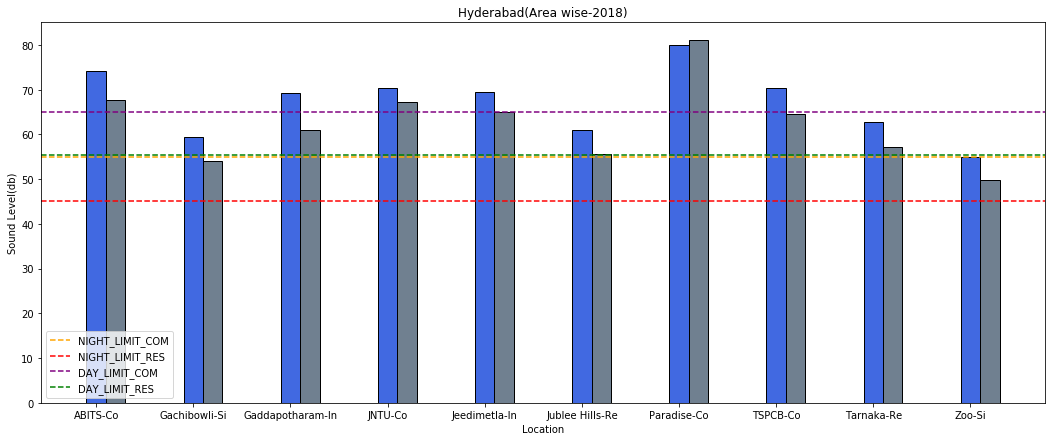

In [46]:
r1 = np.arange(df_hyderabad_loc.shape[0])
r1
width1 = .2
plt.figure(figsize=(18, 7))
plt.bar(df_hyderabad_loc['Location']+"-"+df_hyderabad_loc['Type'].str[:2],df_hyderabad_loc['Day'],
        width=width1, color='royalblue', edgecolor = 'k')
plt.bar(r1+width1, df_hyderabad_loc['Night'], width=width1, color='slategrey',  edgecolor = 'k')
# Limit lines
plt.axhline(y=NIGHT_LIMIT_COM, label="NIGHT_LIMIT_COM", linestyle='dashed', color="orange")
plt.axhline(y=NIGHT_LIMIT_RES, label="NIGHT_LIMIT_RES", linestyle='dashed', color="red")
plt.axhline(y=DAY_LIMIT_COM, label="DAY_LIMIT_COM", linestyle='dashed', color="purple")
plt.axhline(y=DAY_LIMIT_RES, label="DAY_LIMIT_RES", linestyle='dashed', color="green")

plt.title("Hyderabad(Area wise-2018)")
plt.xlabel("Location")
plt.ylabel("Sound Level(db)")
plt.legend(loc='lower left')
plt.show()

In [47]:
## Bengaluru

In [48]:
# Bengaluru year wise
df_bengaluru = noise_data[noise_data['City'] == 'Bengaluru']
df_bengaluru_yr = df_bengaluru.groupby('Year')[['Day', 'Night']].mean()
df_bengaluru_yr.head()

,Day,Night
Year,,
2011,60.490909,54.436364
2012,59.433333,52.233333
2013,60.366667,53.650000
2014,60.816667,54.616667
2015,63.575000,57.991667


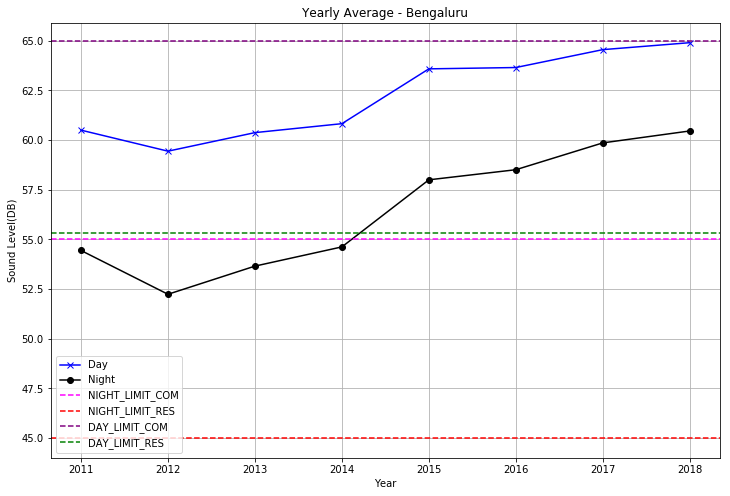

In [92]:
# Bengaluru yearly graph
plt.figure(figsize=(12, 8))
plt.plot(df_bengaluru_yr['Day'], label="Day", marker="x", color="blue")
plt.plot(df_bengaluru_yr['Night'], label="Night", marker="o", color="Black")
plt.xlabel("Year")
plt.ylabel("Sound Level(DB)")
plt.title('Yearly Average - Bengaluru')
plt.axhline(y=NIGHT_LIMIT_COM, label="NIGHT_LIMIT_COM", linestyle='dashed', color="magenta")
plt.axhline(y=NIGHT_LIMIT_RES, label="NIGHT_LIMIT_RES", linestyle='dashed', color="red")
plt.axhline(y=DAY_LIMIT_COM, label="DAY_LIMIT_COM", linestyle='dashed', color="purple")
plt.axhline(y=DAY_LIMIT_RES, label="DAY_LIMIT_RES", linestyle='dashed', color="green")
plt.legend(loc="lower left")
plt.grid()
plt.show()

In [50]:
# Bengaluru month wise
df_bengaluru = noise_data[noise_data['City'] == 'Bengaluru']
df_bengaluru_month = df_bengaluru.groupby('Month')[['Day', 'Night']].mean()
df_bengaluru_month.head()

,Day,Night
Month,,
1,62.218182,56.490909
2,62.350000,56.666667
3,62.050000,56.400000
4,61.533333,55.883333
5,61.966667,57.450000


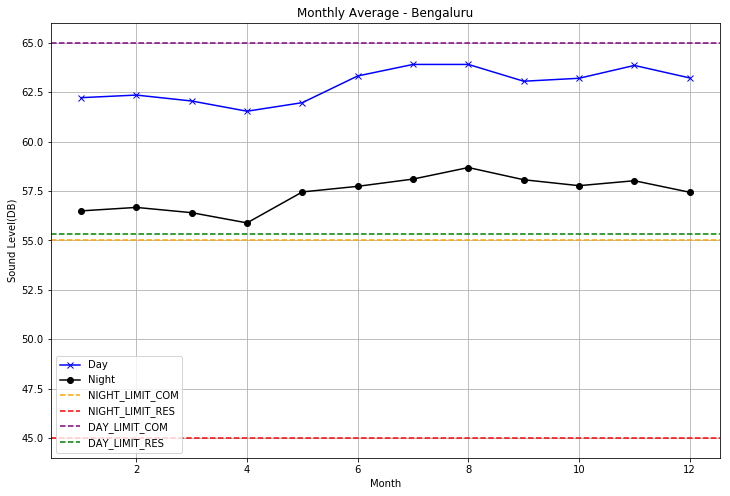

In [93]:
# Bengaluru monthly graph
plt.figure(figsize=(12, 8))
plt.plot(df_bengaluru_month['Day'], label="Day", marker="x", color="blue")
plt.plot(df_bengaluru_month['Night'], label="Night", marker="o", color="Black")
plt.xlabel("Month")
plt.ylabel("Sound Level(DB)")
plt.title('Monthly Average - Bengaluru')
# Limit lines
plt.axhline(y=NIGHT_LIMIT_COM, label="NIGHT_LIMIT_COM", linestyle='dashed', color="orange")
plt.axhline(y=NIGHT_LIMIT_RES, label="NIGHT_LIMIT_RES", linestyle='dashed', color="red")
plt.axhline(y=DAY_LIMIT_COM, label="DAY_LIMIT_COM", linestyle='dashed', color="purple")
plt.axhline(y=DAY_LIMIT_RES, label="DAY_LIMIT_RES", linestyle='dashed', color="green")

plt.legend(loc='lower left')
plt.grid()
plt.show()

In [52]:
# Bengaluru location wise
df_bengaluru_loc = df_bengaluru[df_bengaluru['Year'] == 2018]
df_bengaluru_loc = df_bengaluru_loc.groupby(['Location', 'Type']).agg({'Day': 'mean', 'Night': 'mean'})
df_bengaluru_loc = df_bengaluru_loc.reset_index()
df_bengaluru_loc.head()

,Location,Type,Day,Night
0,BTM,Residential,65.083333,64.583333
1,Domlur,Residential,63.750000,57.500000
2,Marathahalli,Commercial,59.083333,57.250000
3,NIMHANS,Silence,61.500000,58.666667
4,Nisarga Bhawan,Residential,71.750000,66.083333


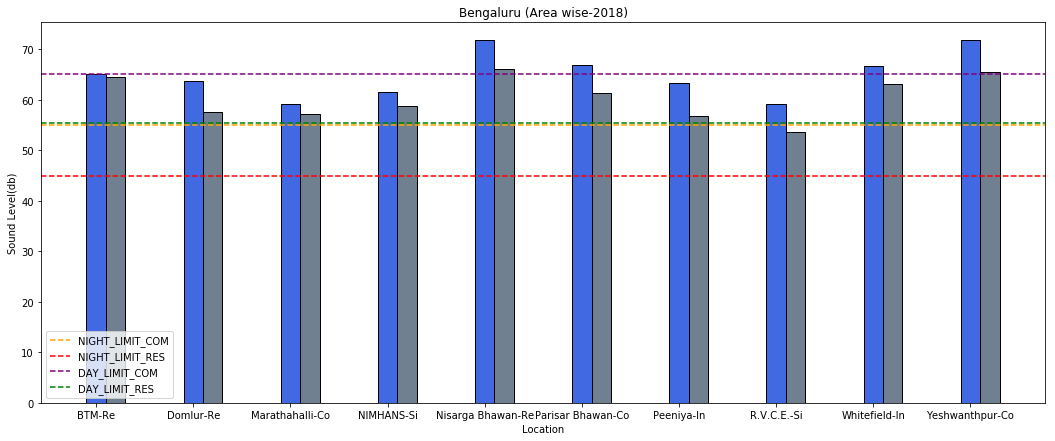

In [53]:
r1 = np.arange(df_bengaluru_loc.shape[0])
r1
width1 = .2
plt.figure(figsize=(18, 7))
plt.bar(df_bengaluru_loc['Location']+"-"+df_bengaluru_loc['Type'].str[:2],df_bengaluru_loc['Day'],
        width=width1, color='royalblue', edgecolor = 'k')
plt.bar(r1+width1, df_bengaluru_loc['Night'], width=width1, color='slategrey',  edgecolor = 'k')
# Limit lines
plt.axhline(y=NIGHT_LIMIT_COM, label="NIGHT_LIMIT_COM", linestyle='dashed', color="orange")
plt.axhline(y=NIGHT_LIMIT_RES, label="NIGHT_LIMIT_RES", linestyle='dashed', color="red")
plt.axhline(y=DAY_LIMIT_COM, label="DAY_LIMIT_COM", linestyle='dashed', color="purple")
plt.axhline(y=DAY_LIMIT_RES, label="DAY_LIMIT_RES", linestyle='dashed', color="green")

plt.title("Bengaluru (Area wise-2018)")
plt.xlabel("Location")
plt.ylabel("Sound Level(db)")
plt.legend(loc='lower left')
plt.show()

## Chennai

In [54]:
# Chennai year wise
df_chennai = noise_data[noise_data['City'] == 'Chennai']
df_chennai_yr = df_chennai.groupby('Year')[['Day', 'Night']].mean()
df_chennai_yr.head()

,Day,Night
Year,,
2011,68.636364,59.509091
2012,69.416667,59.800000
2013,69.766667,60.383333
2014,69.800000,61.350000
2015,71.133333,65.041667


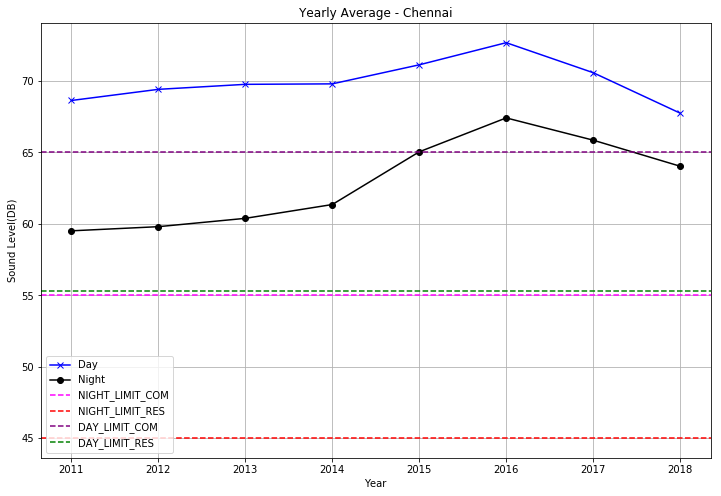

In [95]:
# Chennai yearly graph
plt.figure(figsize=(12, 8))
plt.plot(df_chennai_yr['Day'], label="Day", marker="x", color="blue")
plt.plot(df_chennai_yr['Night'], label="Night", marker="o", color="Black")
plt.xlabel("Year")
plt.ylabel("Sound Level(DB)")
plt.title('Yearly Average - Chennai')
plt.axhline(y=NIGHT_LIMIT_COM, label="NIGHT_LIMIT_COM", linestyle='dashed', color="magenta")
plt.axhline(y=NIGHT_LIMIT_RES, label="NIGHT_LIMIT_RES", linestyle='dashed', color="red")
plt.axhline(y=DAY_LIMIT_COM, label="DAY_LIMIT_COM", linestyle='dashed', color="purple")
plt.axhline(y=DAY_LIMIT_RES, label="DAY_LIMIT_RES", linestyle='dashed', color="green")
plt.legend(loc="lower left")
plt.grid()
plt.show()

In [56]:
# Chennai month wise
df_chennai = noise_data[noise_data['City'] == 'Chennai']
df_chennai_month = df_chennai.groupby('Month')[['Day', 'Night']].mean()
df_chennai_month.head()

,Day,Night
Month,,
1,70.272727,62.927273
2,70.016667,62.850000
3,69.883333,62.533333
4,70.350000,63.383333
5,69.616667,63.250000


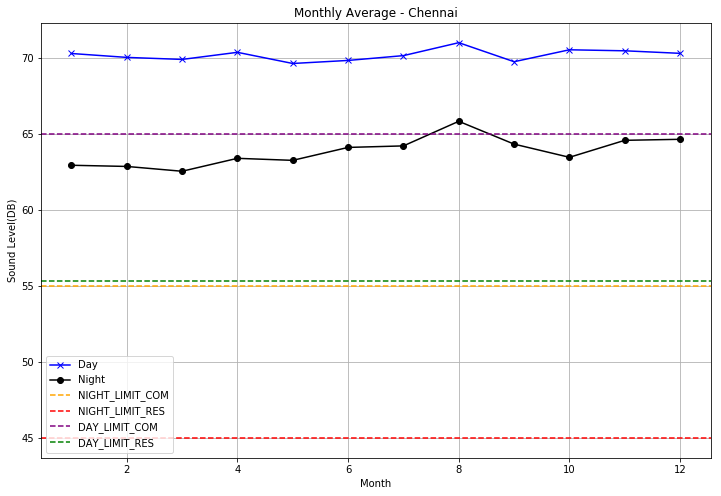

In [96]:
# Chennai monthly graph
plt.figure(figsize=(12, 8))
plt.plot(df_chennai_month['Day'], label="Day", marker="x", color="blue")
plt.plot(df_chennai_month['Night'], label="Night", marker="o", color="Black")
plt.xlabel("Month")
plt.ylabel("Sound Level(DB)")
plt.title('Monthly Average - Chennai')
# Limit lines
plt.axhline(y=NIGHT_LIMIT_COM, label="NIGHT_LIMIT_COM", linestyle='dashed', color="orange")
plt.axhline(y=NIGHT_LIMIT_RES, label="NIGHT_LIMIT_RES", linestyle='dashed', color="red")
plt.axhline(y=DAY_LIMIT_COM, label="DAY_LIMIT_COM", linestyle='dashed', color="purple")
plt.axhline(y=DAY_LIMIT_RES, label="DAY_LIMIT_RES", linestyle='dashed', color="green")

plt.legend(loc='lower left')
plt.grid()
plt.show()

In [58]:
# Chennai location wise
df_chennai_loc = df_chennai[df_chennai['Year'] == 2018]
df_chennai_loc = df_chennai_loc.groupby(['Location', 'Type']).agg({'Day': 'mean', 'Night': 'mean'})
df_chennai_loc = df_chennai_loc.reset_index()
df_chennai_loc.head()

,Location,Type,Day,Night
0,Anna Nagar,Silence,66.500000,59.500000
1,Eye Hospital,Silence,55.583333,52.583333
2,Guindy,Industrial,76.500000,74.000000
3,Pallikaranai,Commercial,70.333333,69.916667
4,Perambur,Commercial,67.000000,62.250000


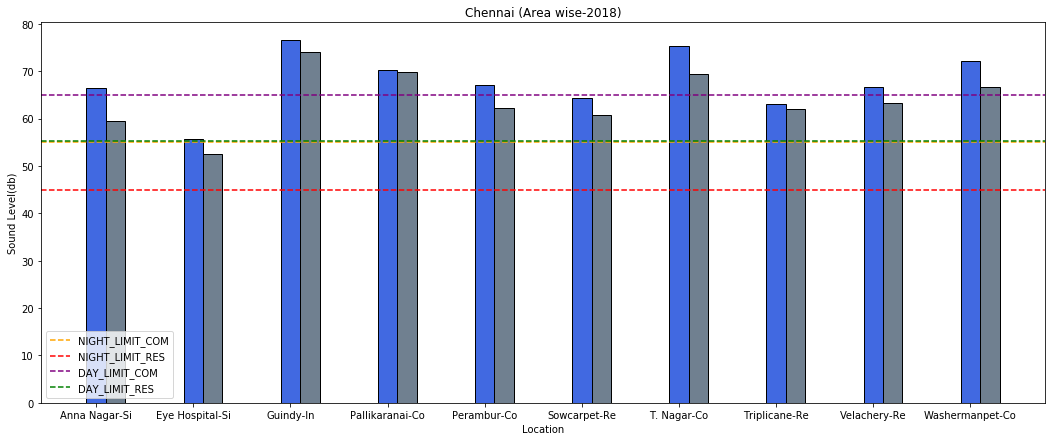

In [59]:
r1 = np.arange(df_chennai_loc.shape[0])
r1
width1 = .2
plt.figure(figsize=(18, 7))
plt.bar(df_chennai_loc['Location']+"-"+df_chennai_loc['Type'].str[:2],df_chennai_loc['Day'],
        width=width1, color='royalblue', edgecolor = 'k')
plt.bar(r1+width1, df_chennai_loc['Night'], width=width1, color='slategrey',  edgecolor = 'k')
# Limit lines
plt.axhline(y=NIGHT_LIMIT_COM, label="NIGHT_LIMIT_COM", linestyle='dashed', color="orange")
plt.axhline(y=NIGHT_LIMIT_RES, label="NIGHT_LIMIT_RES", linestyle='dashed', color="red")
plt.axhline(y=DAY_LIMIT_COM, label="DAY_LIMIT_COM", linestyle='dashed', color="purple")
plt.axhline(y=DAY_LIMIT_RES, label="DAY_LIMIT_RES", linestyle='dashed', color="green")

plt.title("Chennai (Area wise-2018)")
plt.xlabel("Location")
plt.ylabel("Sound Level(db)")
plt.legend(loc='lower left')
plt.show()

## Comparision of 6 cities

In [60]:
# Day noise level
df_city_avg_day = noise_data.groupby(['Year', 'City']).agg({'Day': 'mean'}).\
                reset_index().rename(columns={'Day': 'AVG(Day)'})[['Year', 'City', 'AVG(Day)']]
df_city_avg_day.head()

,Year,City,AVG(Day)
0,2011,Bengaluru,60.490909
1,2011,Chennai,68.636364
2,2011,Delhi,59.763636
3,2011,Hyderabad,65.072727
4,2011,Kolkata,61.727273


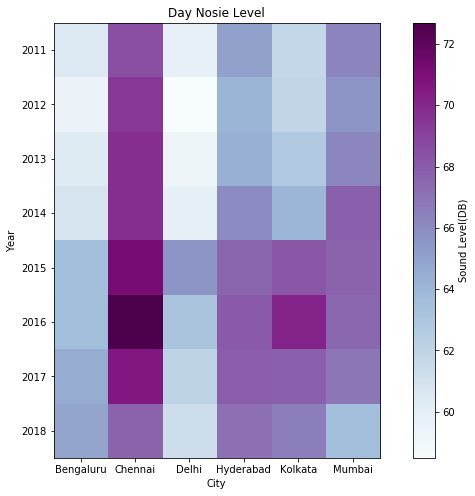

In [61]:
heatmap_data = df_city_avg_day.pivot(index='Year', columns='City', values='AVG(Day)')
# Create heatmap
fig, ax = plt.subplots(figsize=(12, 8))
heatmap = ax.imshow(heatmap_data, cmap='BuPu')

ax.set_xticks(np.arange(len(df_city_avg_day['City'].unique())))
ax.set_yticks(np.arange(len(df_city_avg_day['Year'].unique())))
ax.set_xticklabels(df_city_avg_day['City'].unique())
ax.set_yticklabels(df_city_avg_day['Year'].unique())
plt.xlabel('City')
plt.ylabel('Year')
plt.title('Day Nosie Level')

# Add colorbar
cbar = plt.colorbar(heatmap)
cbar.set_label('Sound Level(DB)')
plt.show()

In [62]:
# Night noise level
df_city_avg_night = noise_data.groupby(['Year', 'City']).agg({'Night': 'mean'}).\
                reset_index().rename(columns={'Night': 'AVG(Night)'})[['Year', 'City', 'AVG(Night)']]
df_city_avg_night.head()

,Year,City,AVG(Night)
0,2011,Bengaluru,54.436364
1,2011,Chennai,59.509091
2,2011,Delhi,55.909091
3,2011,Hyderabad,58.272727
4,2011,Kolkata,55.600000


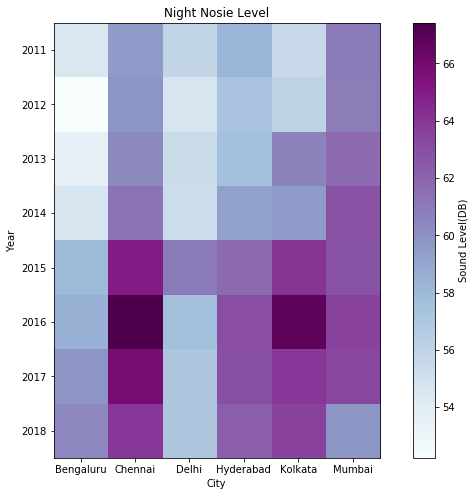

In [70]:
heatmap_data = df_city_avg_night.pivot(index='Year', columns='City', values='AVG(Night)')
# Create heatmap
fig, ax = plt.subplots(figsize=(12, 8))
heatmap = ax.imshow(heatmap_data, cmap='BuPu')

ax.set_xticks(np.arange(len(df_city_avg_day['City'].unique())))
ax.set_yticks(np.arange(len(df_city_avg_day['Year'].unique())))
ax.set_xticklabels(df_city_avg_day['City'].unique())
ax.set_yticklabels(df_city_avg_day['Year'].unique())
plt.xlabel('City')
plt.ylabel('Year')
plt.title('Night Nosie Level')

# Add colorbar
cbar = plt.colorbar(heatmap)
cbar.set_label('Sound Level(DB)')

plt.show()

In [83]:
noise_data.dtypes

Station        object
Year            int64
Month           int64
Day           float64
Night         float64
DayLimit        int64
NightLimit      int64
Location       object
City           object
State          object
Type           object
dtype: object